## kx:0.54

In [233]:
%run /u/cmor/jupyter/HP_project/main.ipynb
def convergence_fitter(plot='real'):

    global scan, t0, tf # Get all this stuff needed
    
    all_a = []
    all_b = []
    all_c = []
    all_d = []
    all_e = []
    all_m = []
    all_g = []
    all_k = []
    all_x = []
    all_r = []
    
    ke = len(scan)
    
    if plot != None:
        plt.figure()
        plt.xlabel('Time units $(a/\\rho_{ti})$')
        plt.ylabel('Zonal Potential $(\\frac{\langle\phi_{zf}(t)\\rangle}{\langle\phi_{zf}(0)\\rangle})$')
        plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero
            
    ## Guesses:

    ## Nice low-k LHD:
#     a = 0.01211829
#     b = 0.74438260
#     c = 0.05379711
#     d = 0.31133248
#     e = 0.03005418
#     g = 2.60337992
#     k = 0.00891163
#     m = 0.30807454

    # ## Realistic W7-X
#     a = -0.11281396
#     b = 2.17348488
#     c = 7.0783e-09
#     d = -1.41262475
#     e = 0.00928013
#     g = 1.80730195
#     k = 8.9030e-07
#     m = 0.53971275
    
    ## LHD_surf_0026
#     a = 0.05126107
#     b = 0.13020194
#     c = 0.01299829
#     d = 9.83095429
#     e = 0.03139539
#     g = 3.11837672
#     k = 0.01949793
#     m = 0.76578451

    # W7-X surface kx:0.05
    a = 0.01738757
    b = 0.58281430
    c = 0.00289424
    d = 12.1264916
    e = 0.00408636
    g = 1.82598761
    k = 0.02491807
    m = 0.44101235

    for n in range(0, ke):

        y, t = data_grab(t0, tf, n)

        gmodel = lmfit.Model(edi_2)
        if n == 0:
            pars = Parameters()
            pars.add('a', value=a)  # Residual
            pars.add('b', value=b)
            pars.add('c', value=c)
            pars.add('d', value=d)
            pars.add('e', value=e)  # decay
            pars.add('g', value=g)
            pars.add('k', value=k)
            pars.add('m', value=m)
        else:
            pars = Parameters()
            pars.add('a', value=all_a[-1])  # , min=0.0005, max=0.035)  # Residual
            pars.add('b', value=all_b[-1])
            pars.add('c', value=all_c[-1])
            pars.add('d', value=all_d[-1])
            pars.add('e', value=all_e[-1])  # decay
            pars.add('g', value=all_g[-1])
            pars.add('k', value=all_k[-1])
            pars.add('m', value=all_m[-1])

        result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

        all_a = np.append(all_a, result.best_values.get("a"))
        all_b = np.append(all_b, result.best_values.get("b"))
        all_c = np.append(all_c, result.best_values.get("c"))
        all_d = np.append(all_d, result.best_values.get("d"))
        all_e = np.append(all_e, result.best_values.get("e"))
        all_m = np.append(all_m, result.best_values.get("m"))
        all_g = np.append(all_g, result.best_values.get("g"))
        all_k = np.append(all_k, result.best_values.get("k"))
        all_x = np.append(all_x, result.chisqr)
        all_r = np.append(all_r, 1 - result.residual.var() / np.var(y))

        if plot != None:
#             plt.plot(t, result.init_fit, label=r"Initial guess")
#             plt.plot(t, result.best_fit, 'r--', linewidth=1, label=r"Best fit", alpha=0.5)
            plt.plot(t, y, label='{0}'.format(scan[n]))
    if plot != None:
#         plt.yscale('log')
#         plt.legend()
        plt.show()
        
#     all_a = np.flip(all_a)
#     all_b = np.flip(all_b)
#     all_c = np.flip(all_c)
#     all_d = np.flip(all_d)
#     all_e = np.flip(all_e)
#     all_m = np.flip(all_m)
#     all_g = np.flip(all_g)
#     all_k = np.flip(all_k)
#     all_x = np.flip(all_x)
#     all_r = np.flip(all_r)

    return all_x, all_r, all_a, all_e

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time
[[Model]]
    Model(edi_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 731
    # data points      = 2174
    # variables        = 8
    chi-square         = 0.02250893
    reduced chi-square = 1.0392e-05
    Akaike info crit   = -24937.5357
    Bayesian info crit = -24892.0611
[[Variables]]
    a:  0.65489474 +/- 0.10186630 (15.55%) (init = 0.1343934)
    b:  0.77139692 +/- 0.07017053 (9.10%) (init = 0.4897794)
    c:  4.4636e-05 +/- 2.7386e-06 (6.14%) (init = 6.7678e-05)
    d:  20.5228846 +/- 0.12280376 (0.60%) (init = 19.33058)
    e:  3.2603e-05 +/- 1.2554e-05 (38.51%) (init = 0.00022336)
    g:  1.15407354 +/- 0.01681970 (1.46%) (init = 1.045596)
    k:  0.16998600 +/- 0.00710904 (4.18%) (init = 0.2027906)
    m:  0.43704658 +/- 0.00334771 (0.77%) (init = 0.4464569)


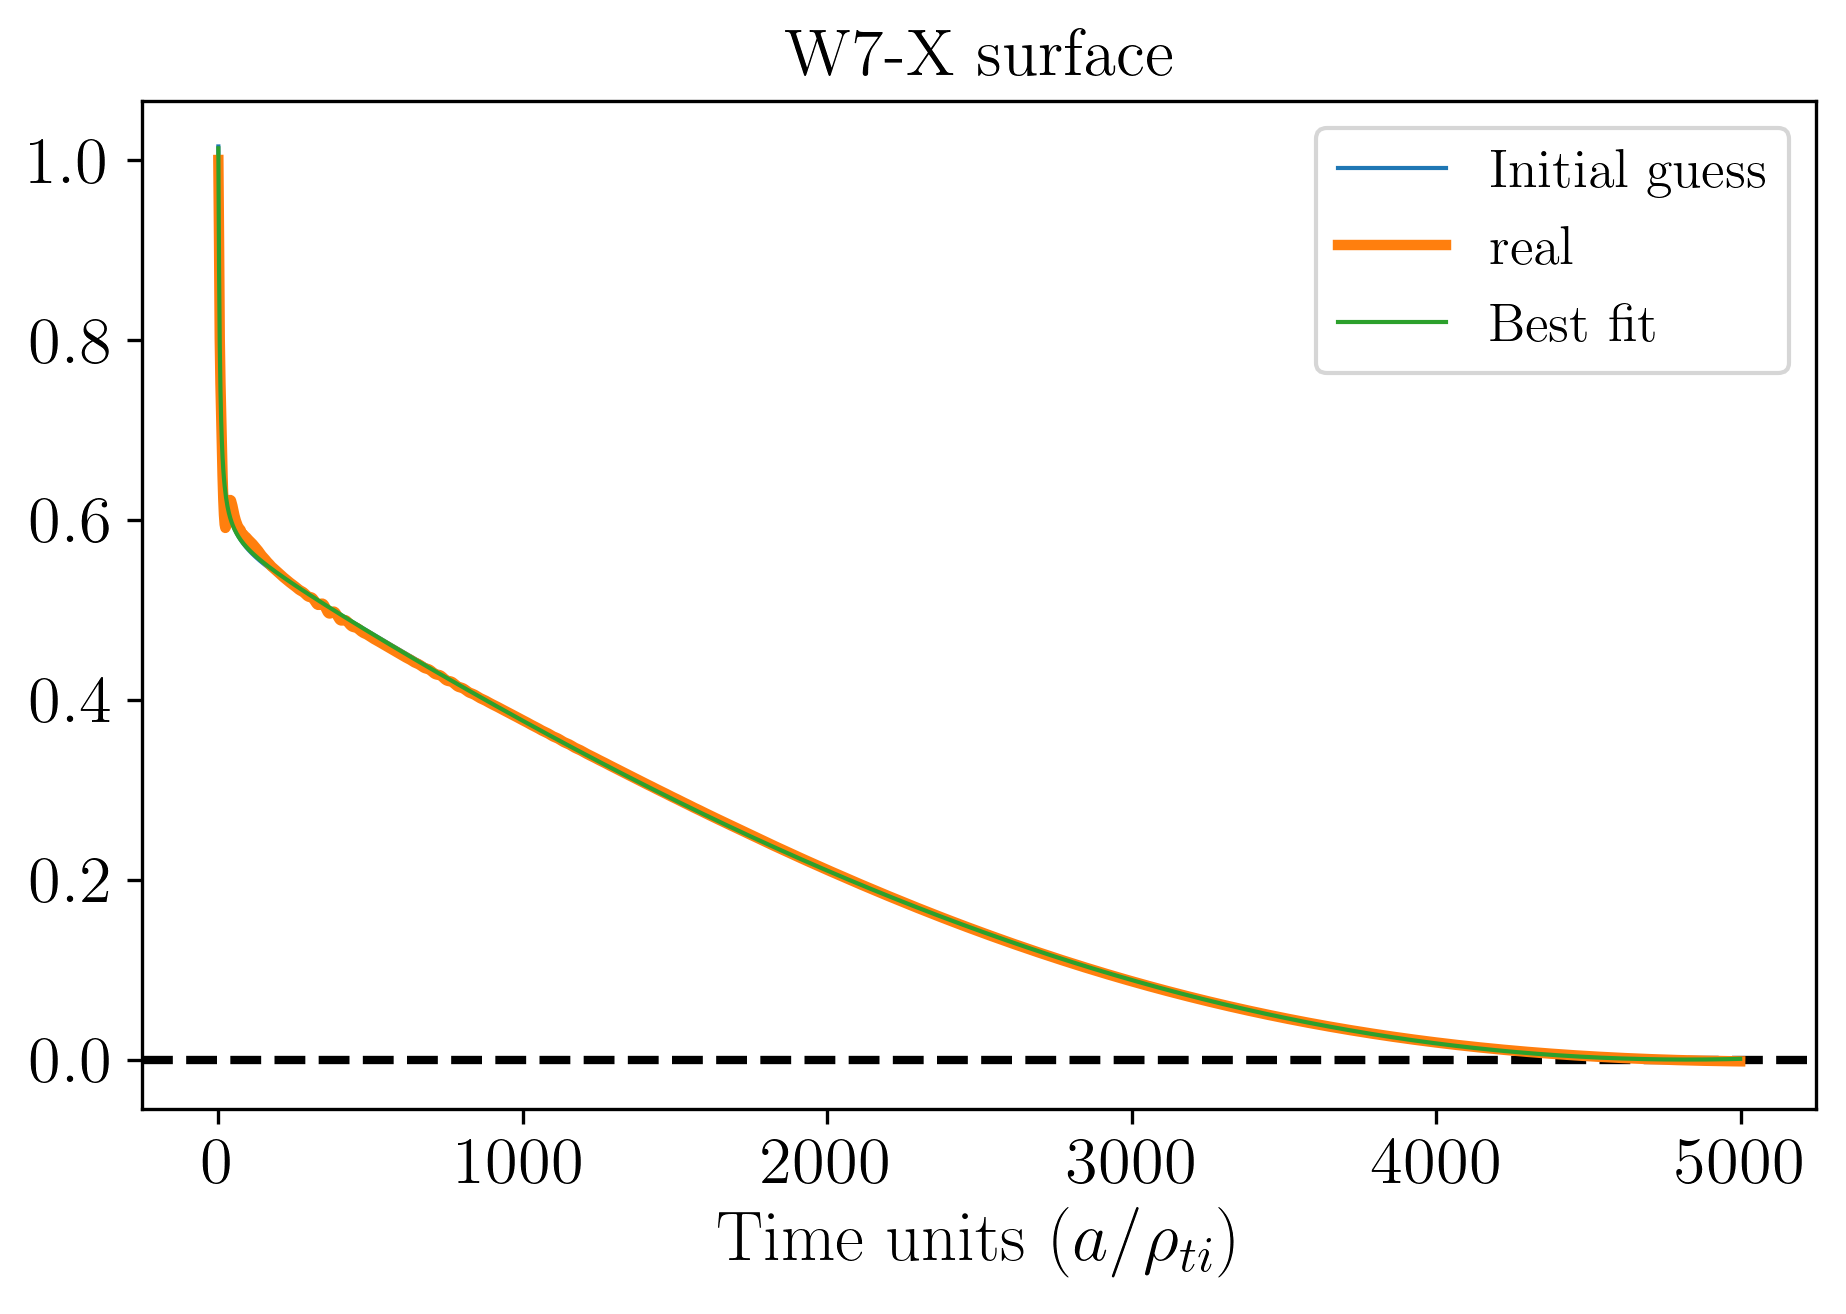

In [264]:
%cd /raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time
label   = "surface"
log = False
t0 = 0
tf = 5000
    
# Start plotting details, label and title
plt.figure()
plt.xlabel('Time units $(a/\\rho_{ti})$')
plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero

# End plotting details
flnm = "timetraceions_0030.dat"
gam = pylab.loadtxt("{0}".format(flnm))

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# Crop the time trace to the required values

if t0 != None:
    ini = (np.abs(t - t0)).argmin()
else:
    ini = (np.abs(t - t[0])).argmin()
if tf != None:
    fin = (np.abs(t - tf)).argmin()
else:
    fin = (np.abs(t - t[-1])).argmin()

y = a[ini:fin]
t = t[ini:fin]

# W7-X surface kx:0.05
# a = 0.01738757
# b = 0.58281430
# c = 0.00289424
# d = 12.1264916
# e = 0.00408636
# g = 1.82598761
# k = 0.02491807
# m = 0.44101235

# W7-X surface 0030 (6000)
a = 0.13439345
b = 0.48977940
c = 6.7678e-05
d = 19.3305767
e = 2.2336e-04
g = 1.04559575
k = 0.20279057
m = 0.44645688

gmodel = lmfit.Model(edi_2)

pars = Parameters()
pars.add('a', value=a)  # Residual
pars.add('b', value=b)
pars.add('c', value=c)
pars.add('d', value=d)
pars.add('e', value=e)  # decay
pars.add('g', value=g)
pars.add('k', value=k)
pars.add('m', value=m)


result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

print(result.fit_report(show_correl=False))

plt.plot(t, result.init_fit, label=r"Initial guess", linewidth=1)
plt.plot(t, y, label='real')
plt.plot(t, result.best_fit, linewidth=1, label=r"Best fit")
plt.title(r"W7-X surface")
# plt.ylim(ymax=1)
# plt.xlim(xmin=0)
plt.legend()

# plt.text(300, 0.1, '{0}'.format(result.fit_report(show_correl=False)), fontsize=6.5)
plt.show()

r2 = 1 - result.residual.var() / np.var(y)

In [255]:
%cd /raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time
label   = "w7x-surface"
# End plotting details

gam = pylab.loadtxt("timetraceions_0030.dat")

E = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# W7-X surface kx:0.5
a = 0.01738757
b = 0.58281430
c = 0.00289424
d = 12.1264916
e = 0.00408636
g = 1.82598761
k = 0.02491807
m = 0.44101235

# W7-X surface 0030
a = 0.13439345
b = 0.48977940
c = 6.7678e-05
d = 19.3305767
e = 2.2336e-04
g = 1.04559575
k = 0.20279057
m = 0.44645688

r2 = []
res = []
tstep = []

for kekke in range(20, len(t), 100):

    y = E[:kekke]
    p = t[:kekke]

    gmodel = lmfit.Model(edi_2)

    pars = Parameters()
    pars.add('a', value=a)  # Residual
    pars.add('b', value=b)
    pars.add('c', value=c)
    pars.add('d', value=d)
    pars.add('e', value=e)  # decay
    pars.add('g', value=g)
    pars.add('k', value=k)
    pars.add('m', value=m)
    result = gmodel.fit(y, pars, t=p, nan_policy='propagate')
    r2 = np.append(r2, 1 - result.residual.var() / np.var(y))
    res = np.append(res, result.best_values.get("a"))
    tstep = np.append(tstep, p[-1])

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time


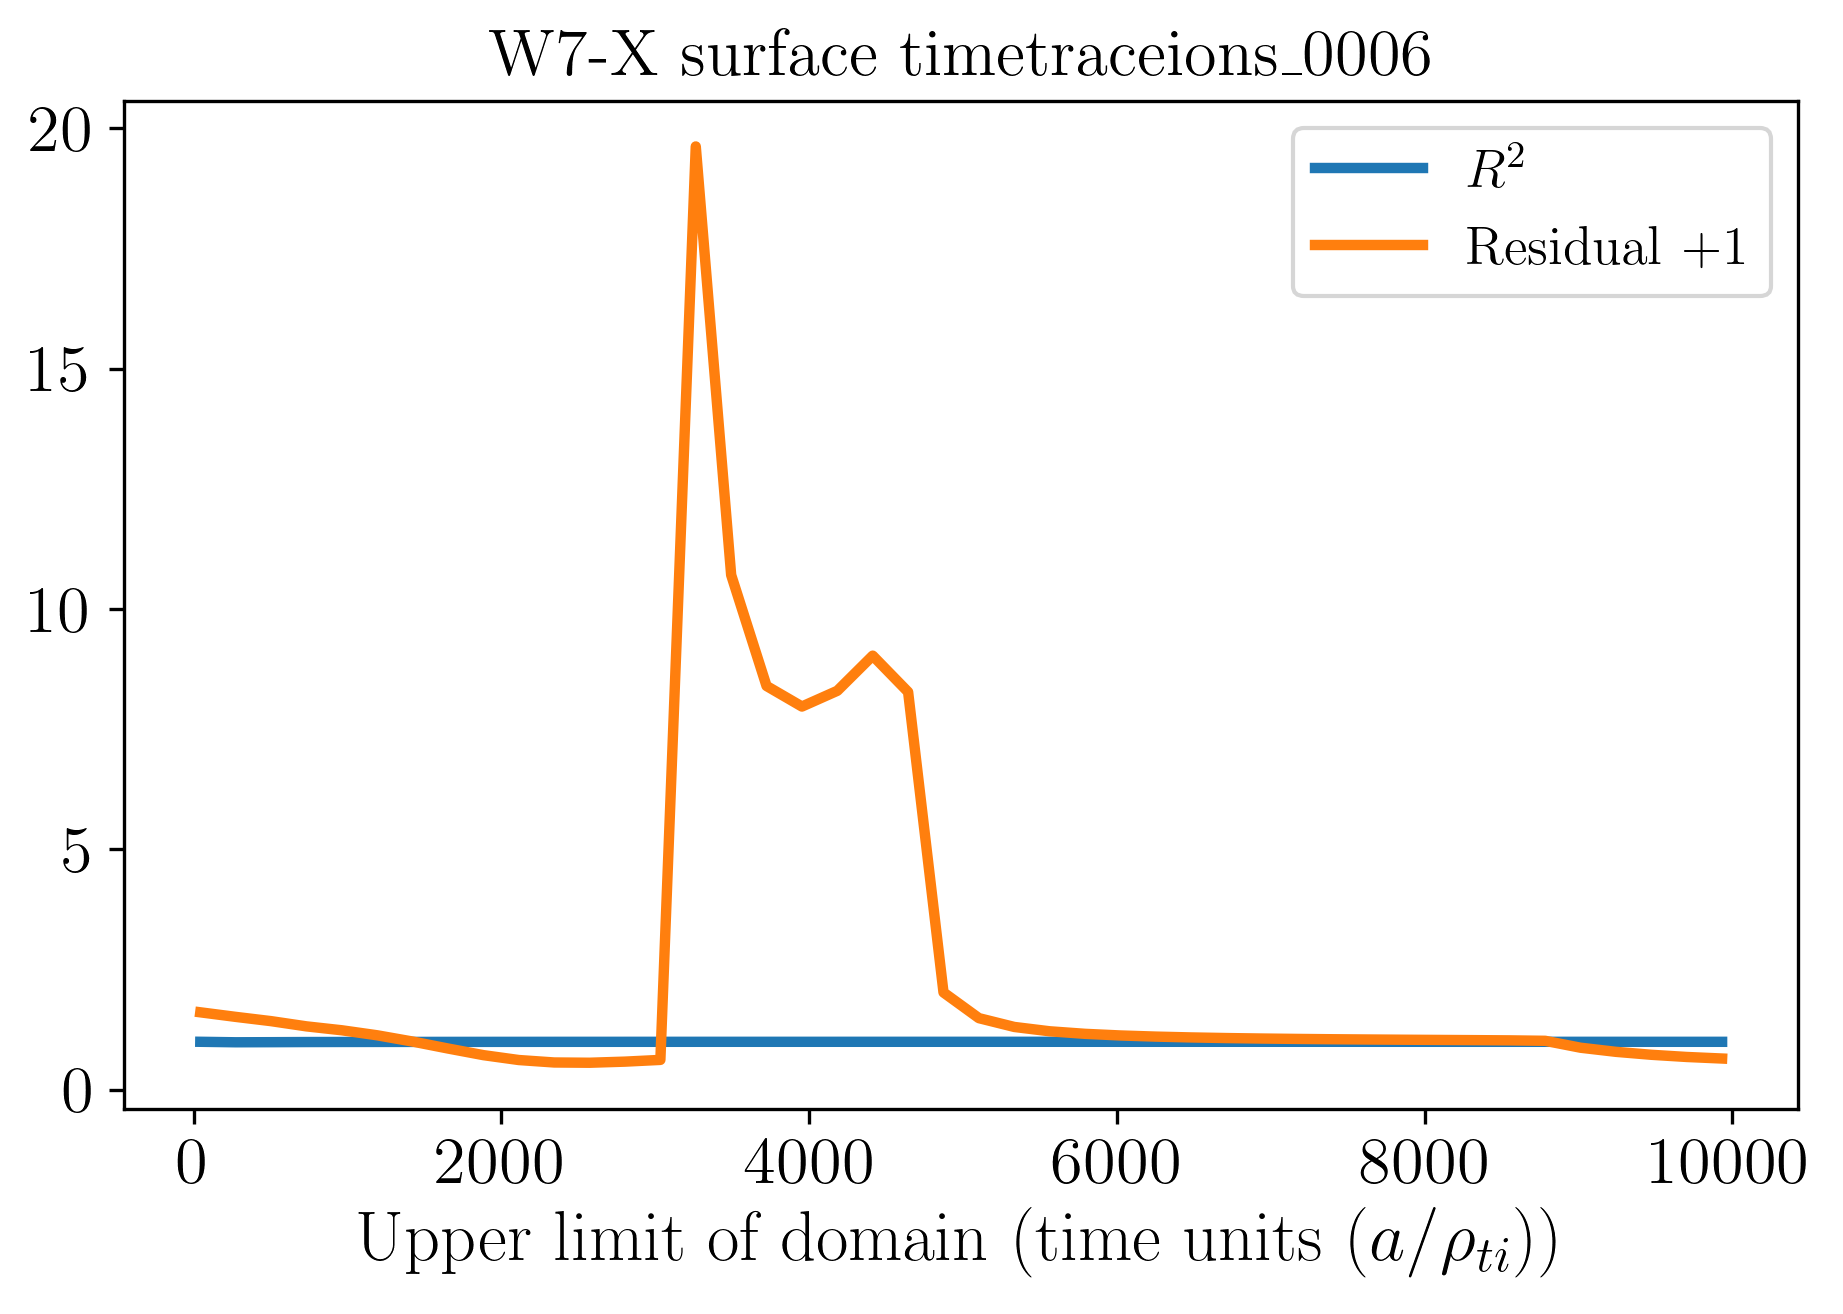

In [257]:
tstep_1 = tstep
r2_1 = r2
res_1 = res
plt.plot(tstep_1, r2_1, label=r"$R^{2}$")
plt.plot(tstep_1, res_1 + 1, label=r"Residual +1")
# plt.ylim(ymax=1.5, ymin=0.4)
# plt.xlim(xmin=500)
plt.title(r"W7-X surface timetraceions\_0006")
plt.xlabel(r"Upper limit of domain (time units $(a/\rho_{ti})$)")
# plt.ylabel(r"$R^{2}$")
plt.legend()
plt.show()

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/test


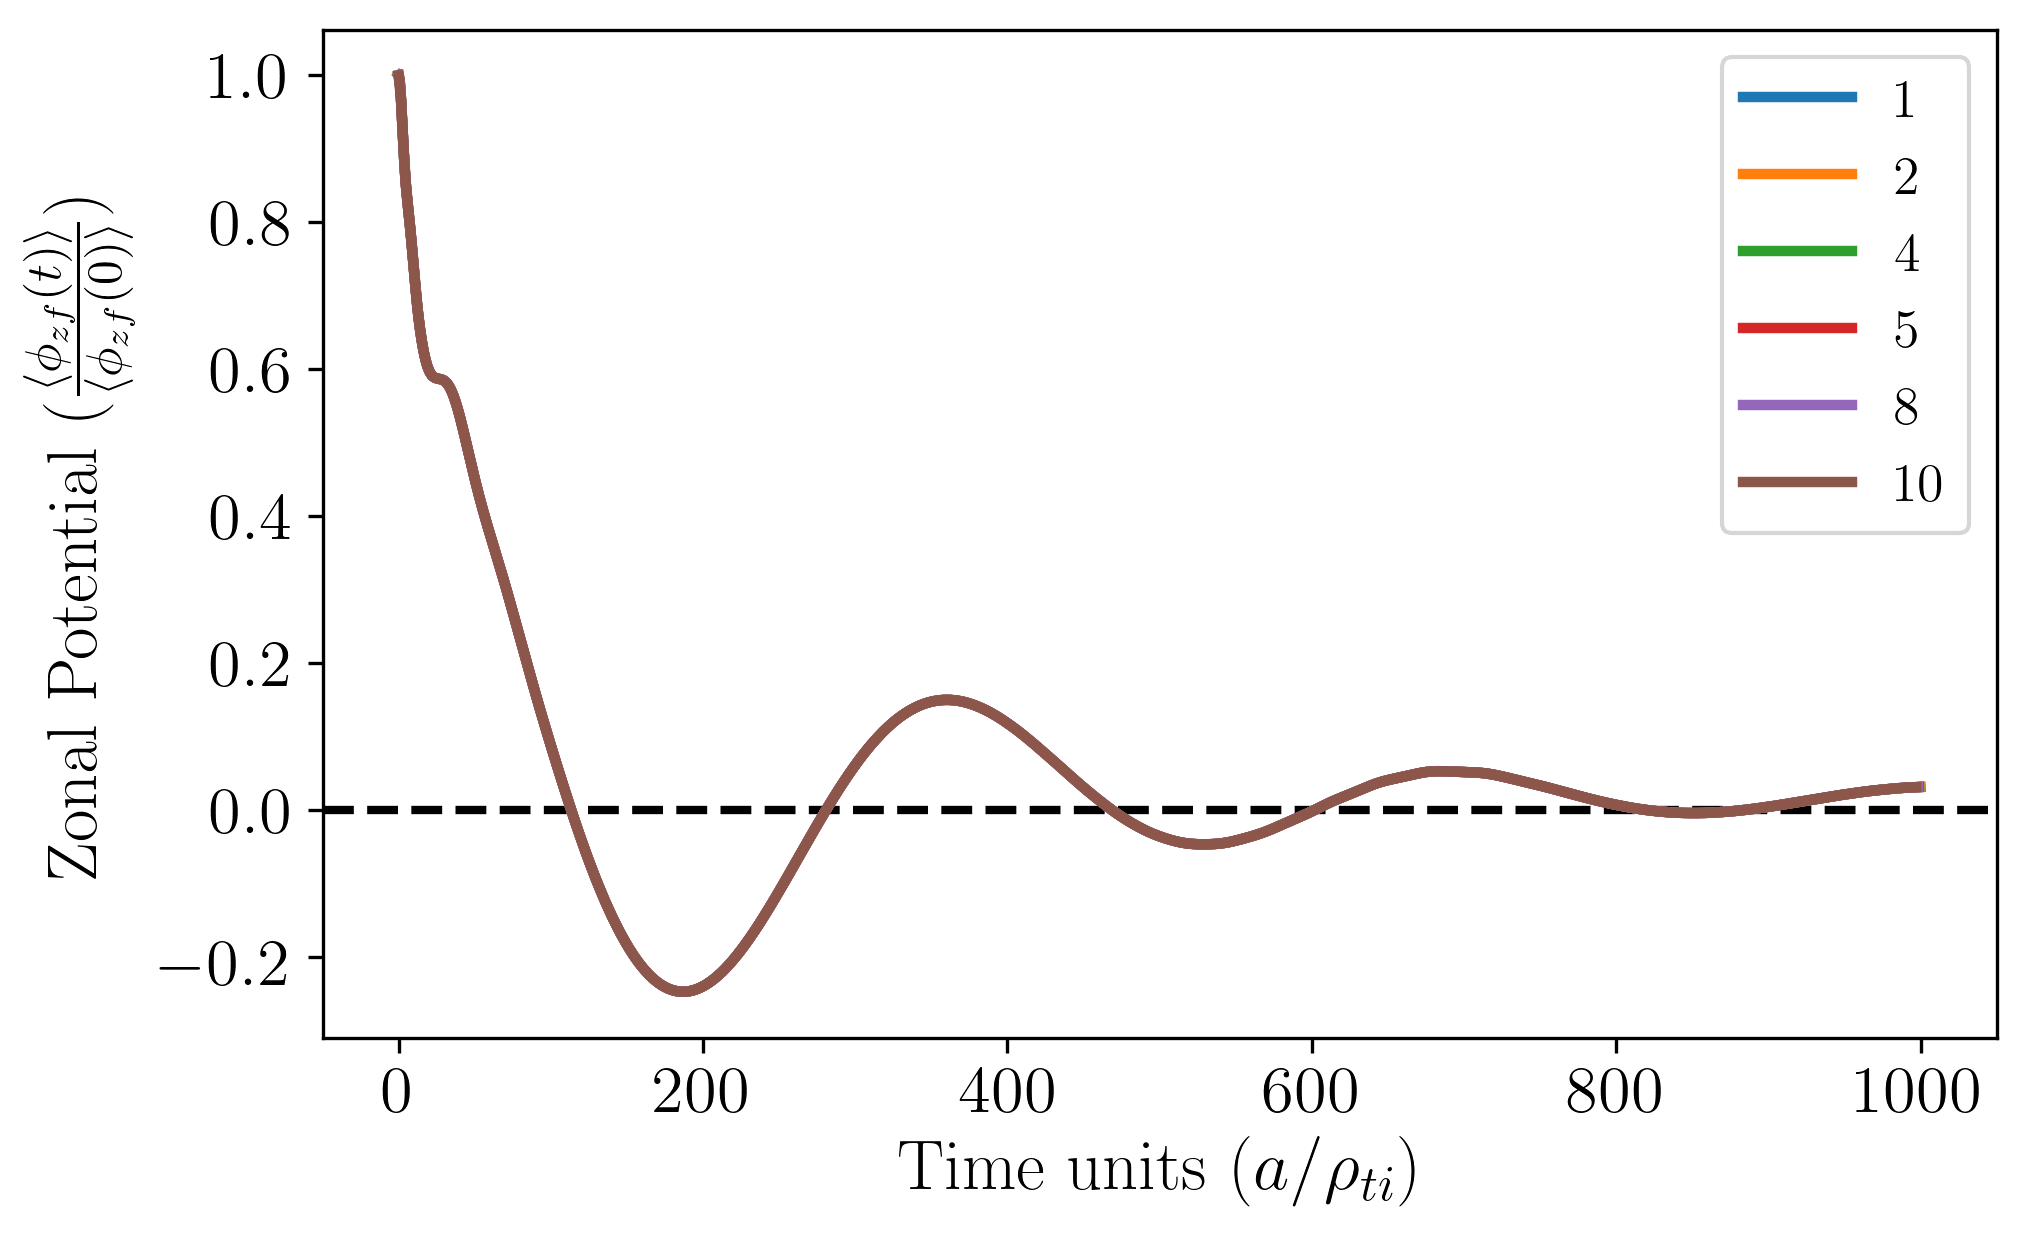

In [138]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/test
t0 = 0
tf = 1000
scan = 1, 2, 4, 5, 8, 10# sparse factor
all_x, all_r, all_a, all_e = convergence_fitter(plot='real')

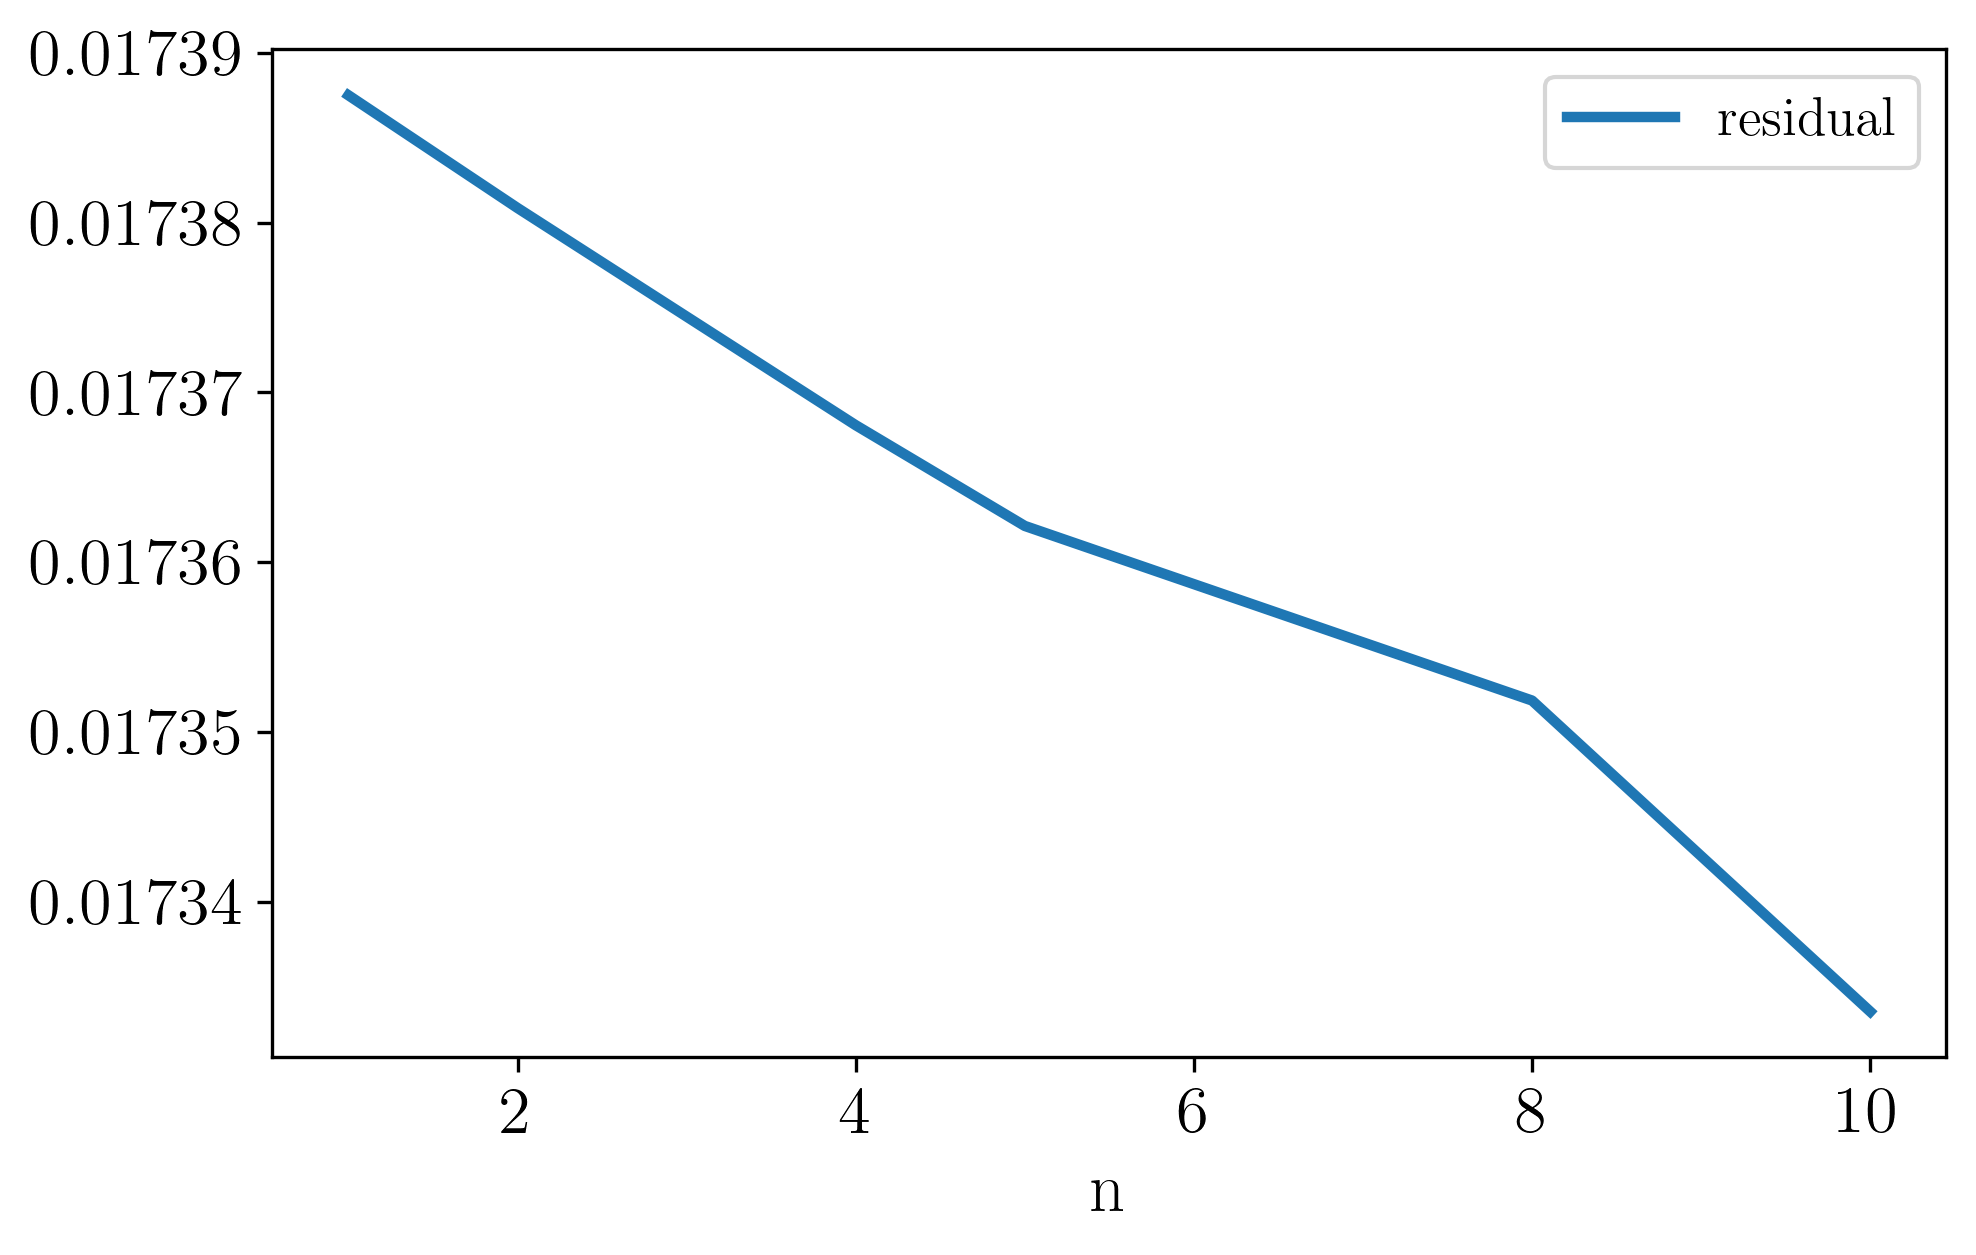

In [139]:
plt.figure()
# plt.plot(scan, all_x, label="$\\chi$")
# plt.plot(scan, all_r, label=r"$R^{2}$")
plt.plot(scan, all_a, label=r"residual")
# plt.plot(scan, all_e, label=r"decay")
plt.xlabel(r"n")
plt.legend()
plt.show()

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_lohi


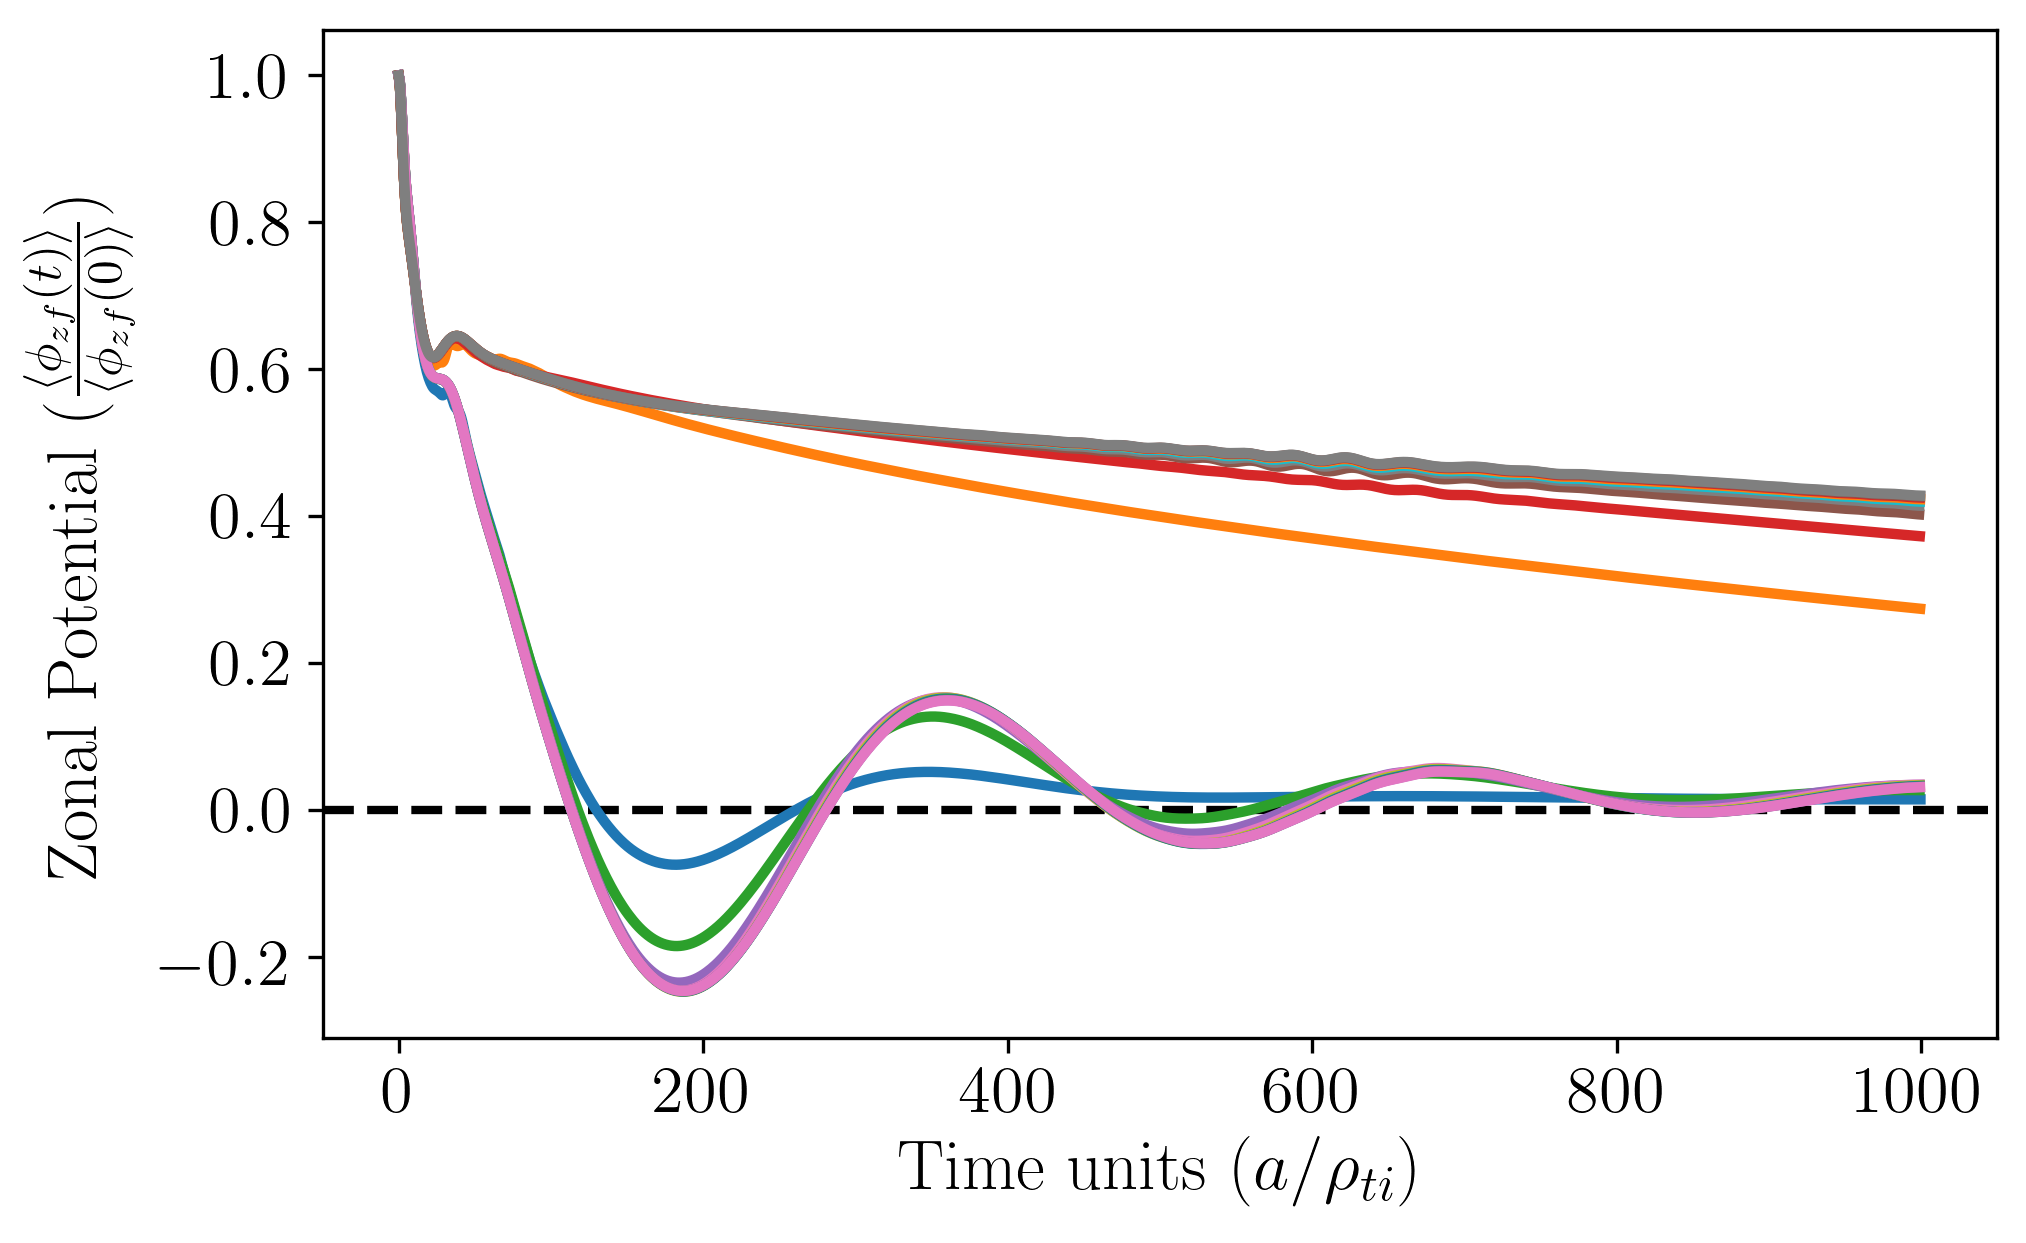

In [258]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_lohi
t0 = 0
tf = 1000
scan = 21, 21, 42, 42, 84, 84, 126, 126, 168, 168, 210, 210, 252, 252, 294, 294, 336, 336
all_x, all_r, all_a, all_e = convergence_fitter(plot='kakakak')
scan_v = scan
res_v = all_r

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nw0_surface_lohi


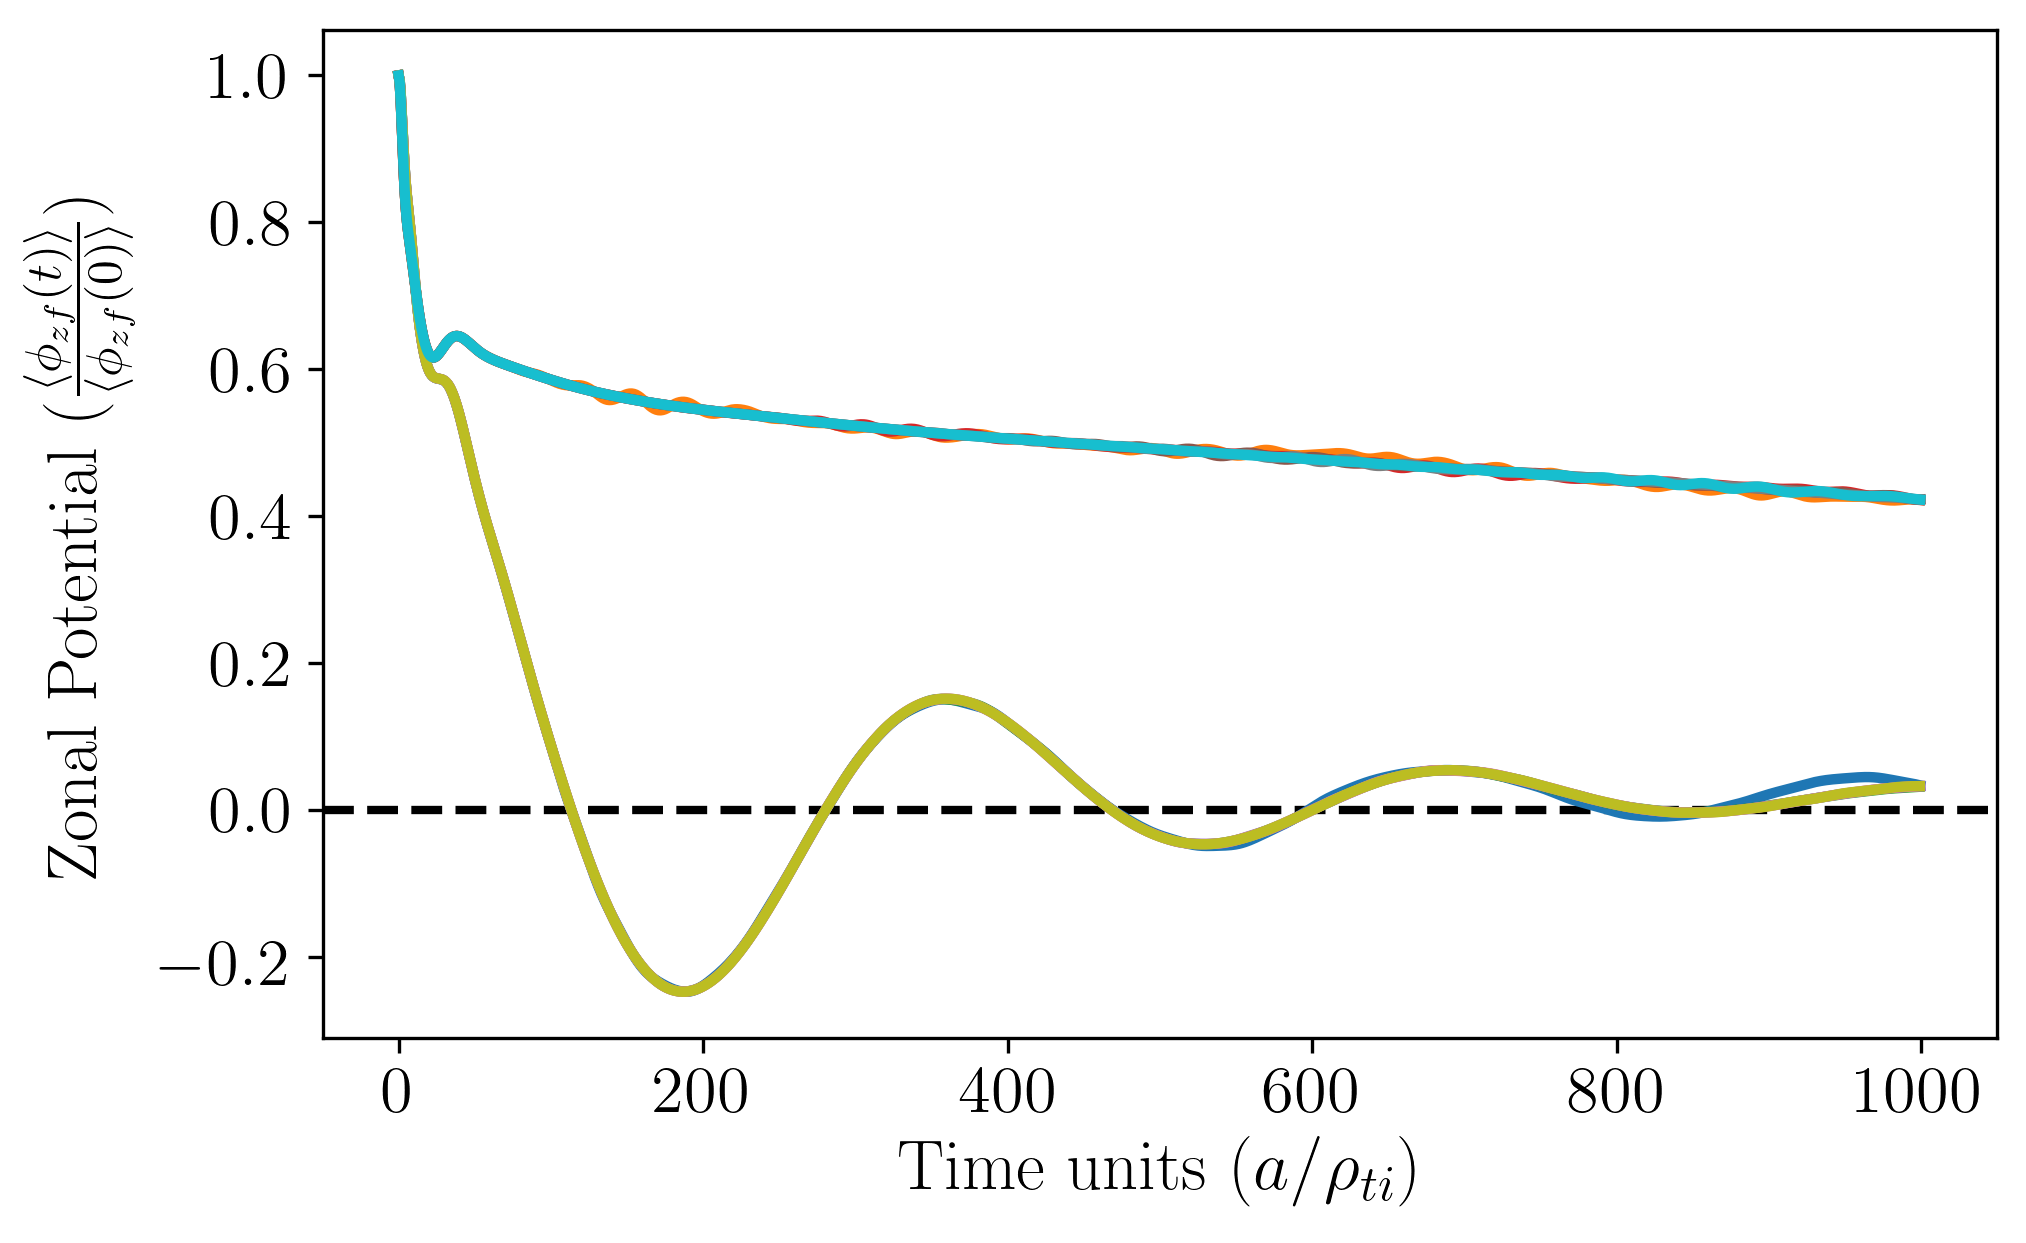

In [259]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nw0_surface_lohi
t0 = 0
tf = 1000
scan = 9, 9, 18, 18, 27, 27, 32, 32, 45, 45
all_x, all_r, all_a, all_e = convergence_fitter(plot='kakakak')
scan_w = scan
res_w = all_r

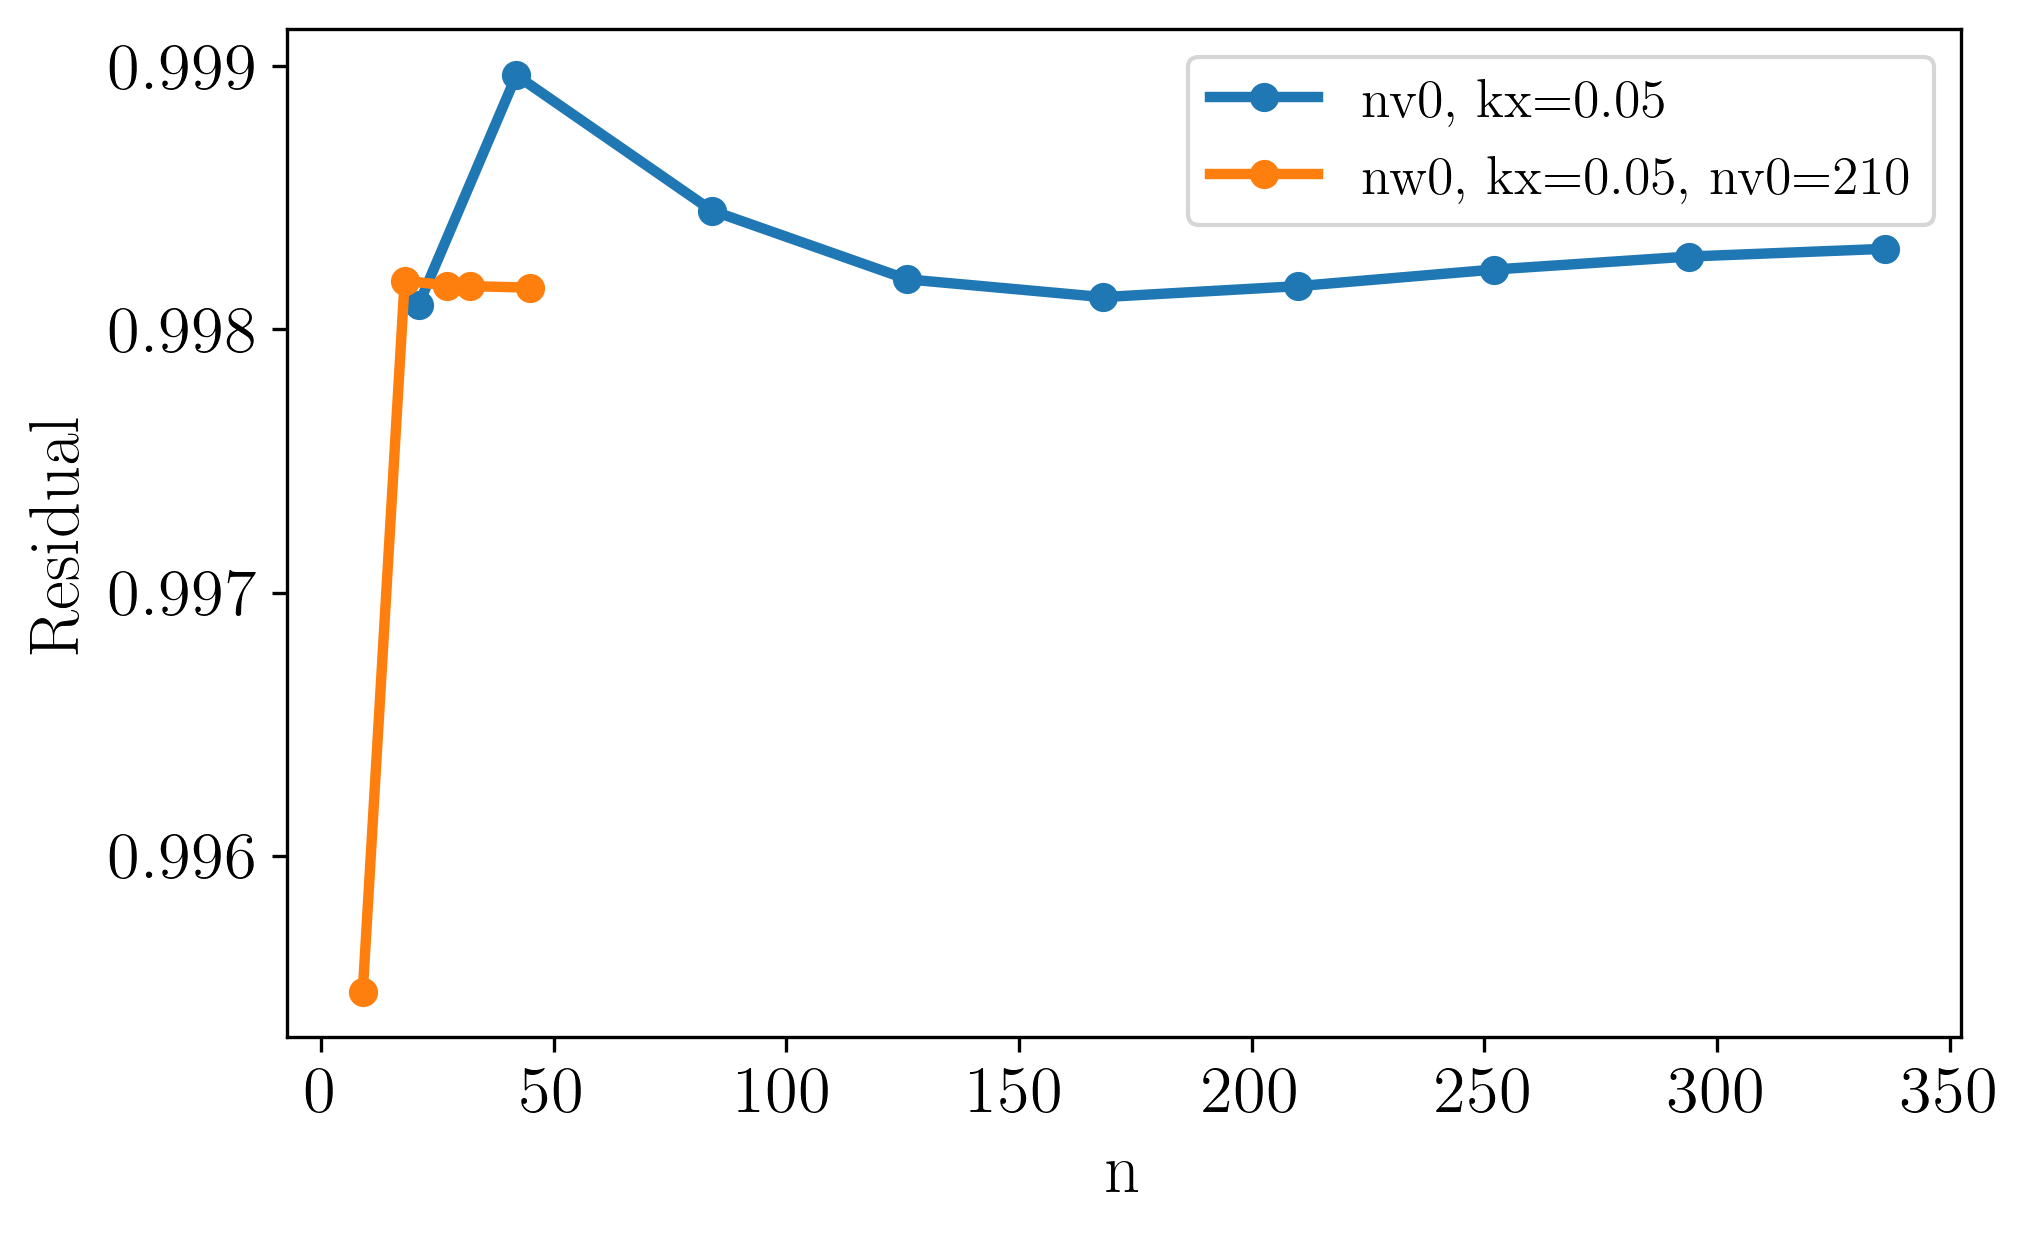

In [260]:
plt.figure()
# plt.plot(scan_v[5::2], res_v[5::2], '-o', label=r"nv0, k=0.8")
plt.plot(scan_v[0::2], res_v[0::2], '-o', label=r"nv0, kx=0.05")
# plt.plot(scan_w[1::2], res_w[1::2], '-o', label=r"nw0, k=0.8, nv0=210")
plt.plot(scan_w[0::2], res_w[0::2], '-o', label=r"nw0, kx=0.05, nv0=210")
plt.xlabel(r"n")
plt.ylabel(r"Residual")
plt.legend()
plt.show()

In [190]:
scan_v[0::2][6]

252

In [188]:
scan_w[0::2][3]

32

In [231]:
scan_half = [0.00001, 0.00004, 0.00008, 0.00012, 0.00016, 0.00020, 0.00024, 0.00028, 0.00032, 0.00036, 0.00040, 0.00100, 0.07989, 0.15879, 0.23768, 0.31658, 0.39547, 0.47437, 0.55326, 0.63216, 0.71105, 0.78995, 0.86884, 0.94774, 1.02663, 1.10553, 1.18442, 1.26332, 1.34221, 1.42111, 1.50000]
scan = []

for n in range(len(scan_half)):
    scan = np.append(scan, scan_half[n])
for n in range(len(scan_half)):
    scan = np.append(scan, scan_half[n])
print(scan)

[1.00000e-05 4.00000e-05 8.00000e-05 1.20000e-04 1.60000e-04 2.00000e-04
 2.40000e-04 2.80000e-04 3.20000e-04 3.60000e-04 4.00000e-04 1.00000e-03
 7.98900e-02 1.58790e-01 2.37680e-01 3.16580e-01 3.95470e-01 4.74370e-01
 5.53260e-01 6.32160e-01 7.11050e-01 7.89950e-01 8.68840e-01 9.47740e-01
 1.02663e+00 1.10553e+00 1.18442e+00 1.26332e+00 1.34221e+00 1.42111e+00
 1.50000e+00 1.00000e-05 4.00000e-05 8.00000e-05 1.20000e-04 1.60000e-04
 2.00000e-04 2.40000e-04 2.80000e-04 3.20000e-04 3.60000e-04 4.00000e-04
 1.00000e-03 7.98900e-02 1.58790e-01 2.37680e-01 3.16580e-01 3.95470e-01
 4.74370e-01 5.53260e-01 6.32160e-01 7.11050e-01 7.89950e-01 8.68840e-01
 9.47740e-01 1.02663e+00 1.10553e+00 1.18442e+00 1.26332e+00 1.34221e+00
 1.42111e+00 1.50000e+00]


/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/hypv_surface_lohi


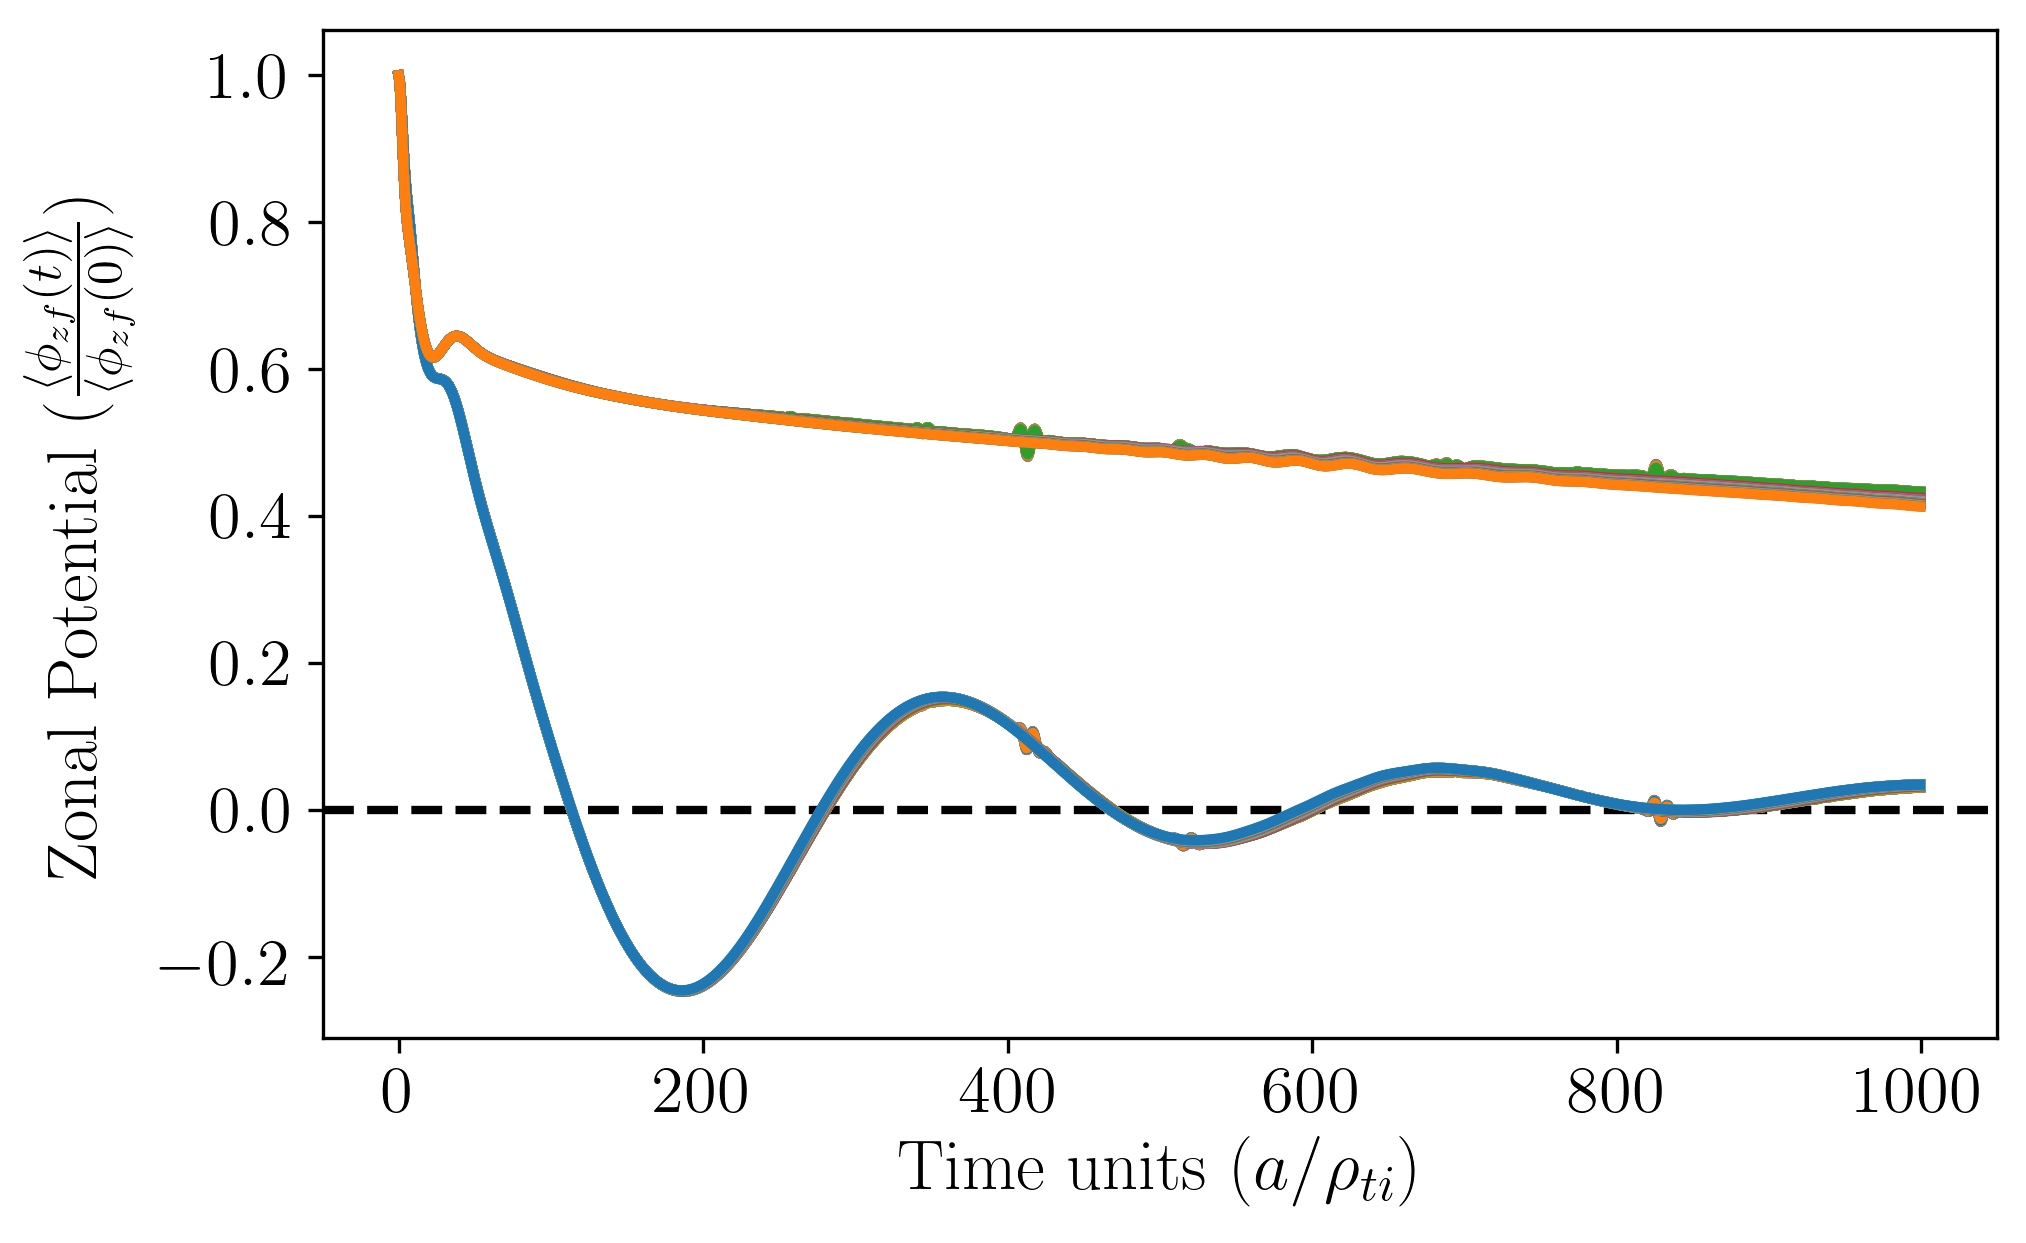

In [234]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/hypv_surface_lohi
t0 = 0
tf = 1000
# scan = [0.00001, 0.00004, 0.00008, 0.00012, 0.00016, 0.00020, 0.00024, 
#         0.00028, 0.00032, 0.00036, 0.00040, 0.00100, 0.07989, 0.15879, 
#         0.23768, 0.31658, 0.39547, 0.47437, 0.55326, 0.63216, 0.71105, 
#         0.78995, 0.86884, 0.94774, 1.02663, 1.10553, 1.18442, 1.26332, 
#         1.34221, 1.42111, 1.50000]
all_x, all_r, all_a, all_e = convergence_fitter(plot='real')
scan_hv = scan
res_hv = all_a

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/hypz_surface_lohi


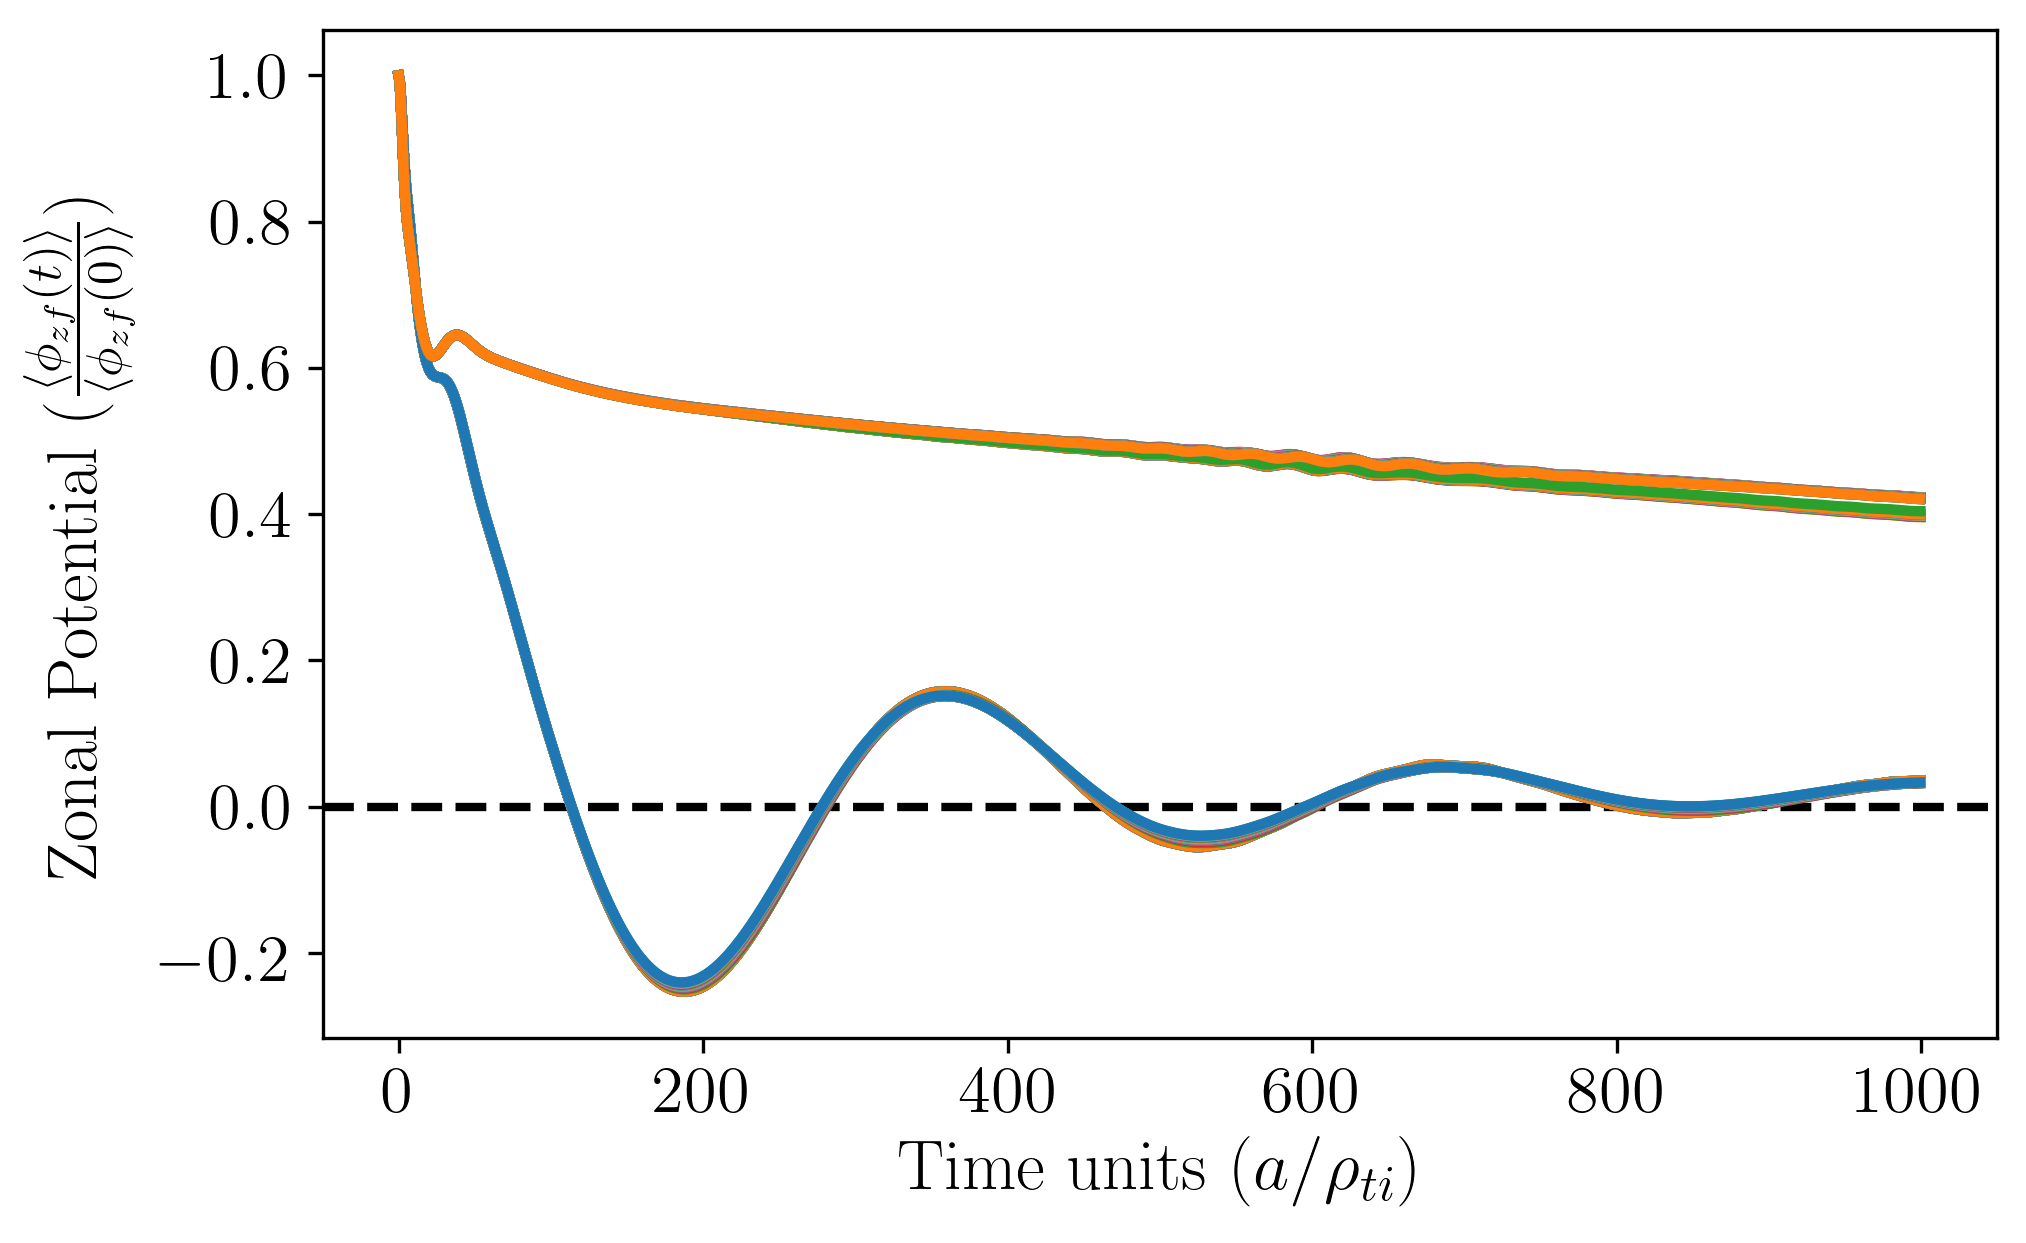

In [235]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/hypz_surface_lohi
t0 = 0
tf = 1000
# scan = [0.00001, 0.00004, 0.00008, 0.00012, 0.00016, 0.00020, 0.00024, 
#         0.00028, 0.00032, 0.00036, 0.00040, 0.00100, 0.07989, 0.15879, 
#         0.23768, 0.31658, 0.39547, 0.47437, 0.55326, 0.63216, 0.71105, 
#         0.78995, 0.86884, 0.94774, 1.02663, 1.10553, 1.18442, 1.26332, 
#         1.34221, 1.42111, 1.50000]
all_x, all_r, all_a, all_e = convergence_fitter(plot='real')
scan_hz = scan
res_hz = all_a

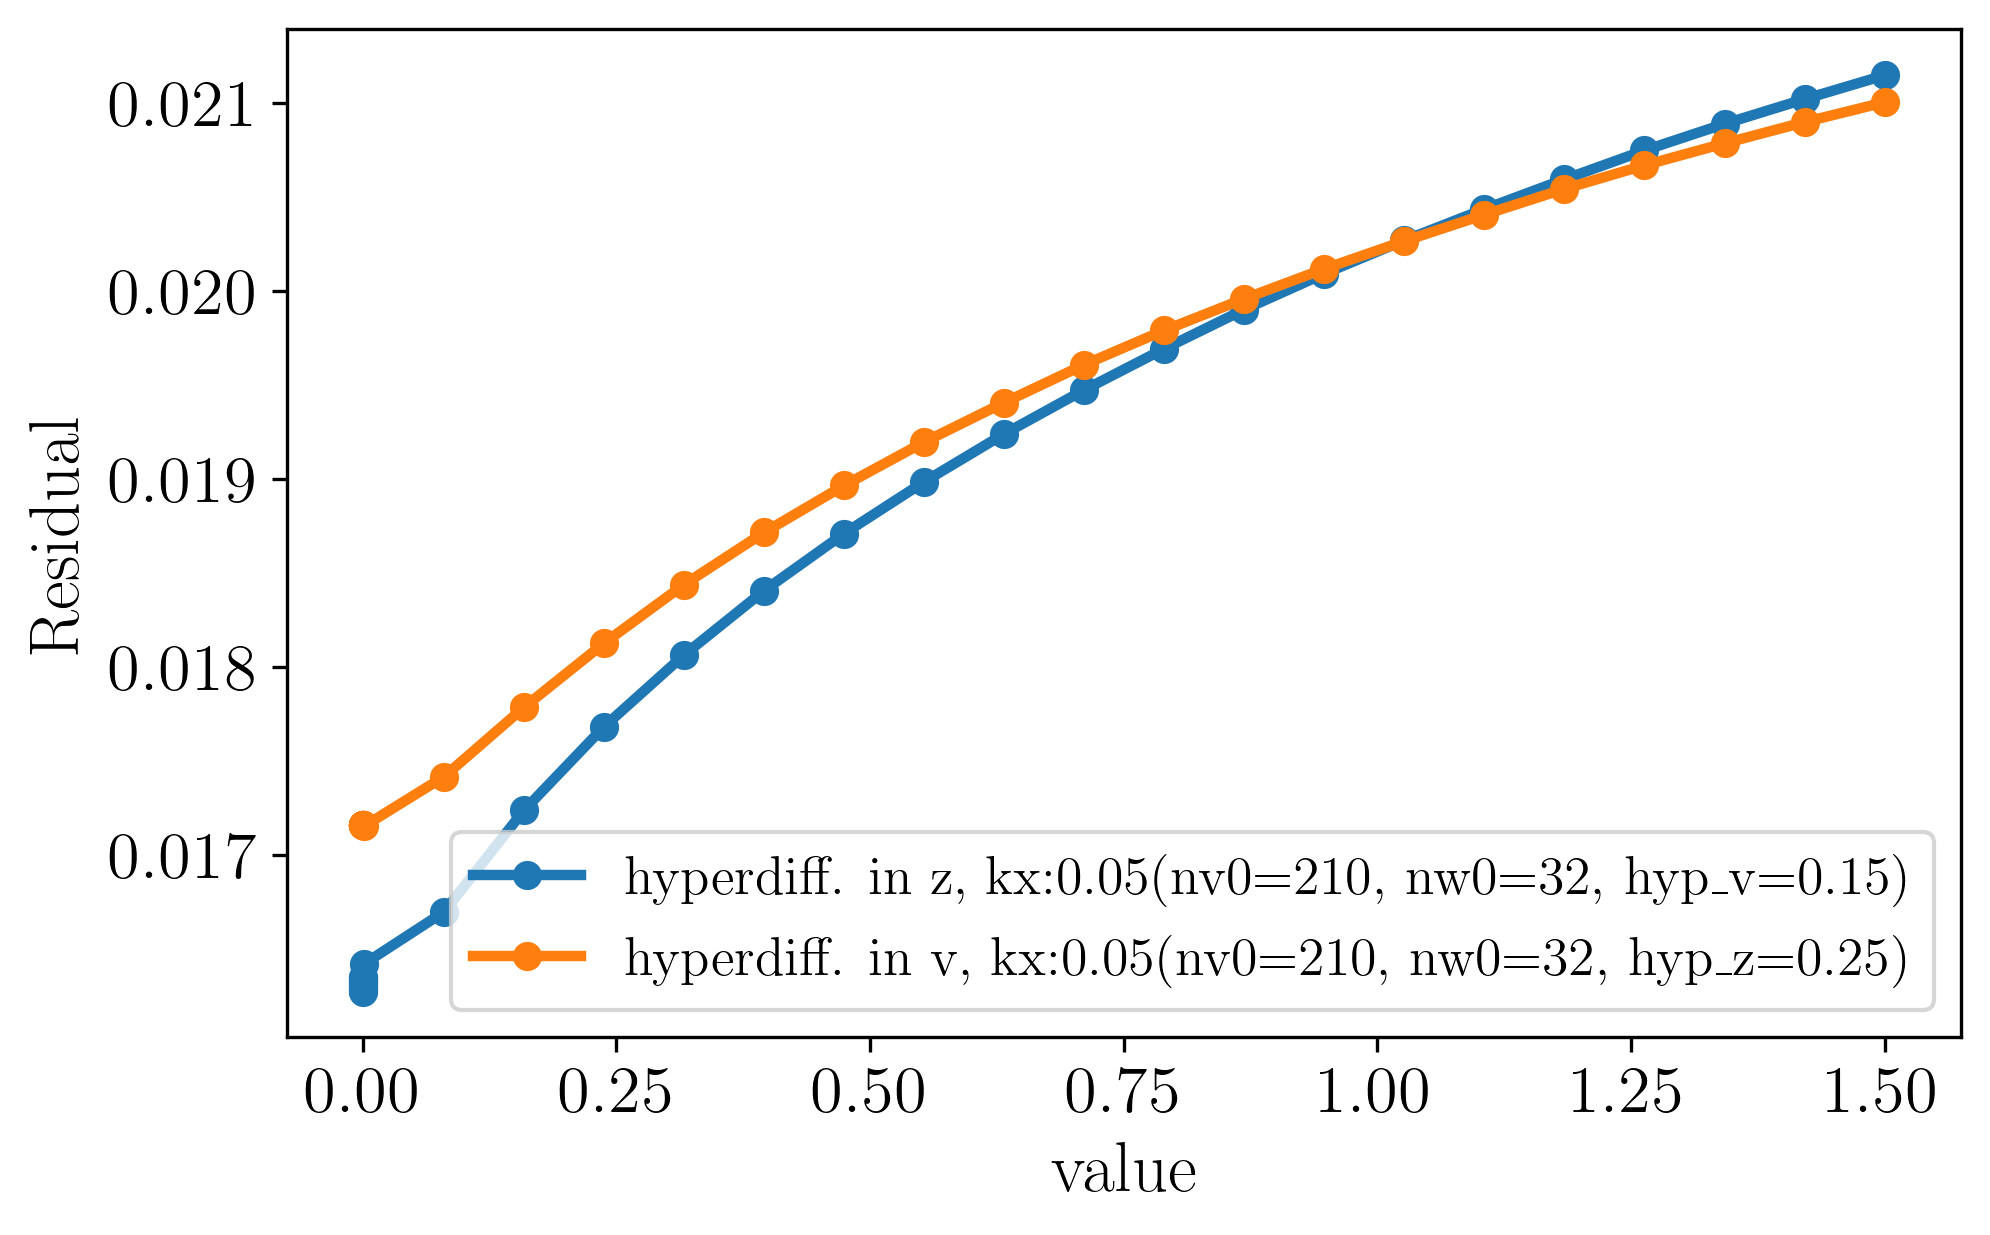

In [240]:
plt.figure()
plt.plot(scan_hz[:31], res_hz[:31], '-o', label=r"hyperdiff. in  z, kx:0.05(nv0=210, nw0=32, hyp\_v=0.15)")
# plt.plot(scan_hz[31:], res_hz[31:], '-o', label=r"hyperdiff. in  z, kx:0.8(nv0=210, nw0=32, hyp\_v=0.15)")
# plt.plot(scan_hz2, res_hz2, '-o', color="C0")
# plt.plot(scan_hz[5], res_hz[5], 'rX')
plt.plot(scan_hv[:31], res_hv[:31], '-o', label=r"hyperdiff. in  v, kx:0.05(nv0=210, nw0=32, hyp\_z=0.25)")
# plt.plot(scan_hv[31:], res_hv[31:], '-o', label=r"hyperdiff. in  v, kx:0.8(nv0=210, nw0=32, hyp\_z=0.25)")
# plt.plot(scan_hv2, res_hv2, '-o', color="C1")
# plt.plot(scan_hv[5], res_hv[5], 'rX')
plt.xlabel(r"value")
plt.ylabel(r"Residual")
# plt.xlim(xmin=0, xmax=0.002)
plt.legend()
plt.show()

In [277]:
scan_hz[41]

0.0004

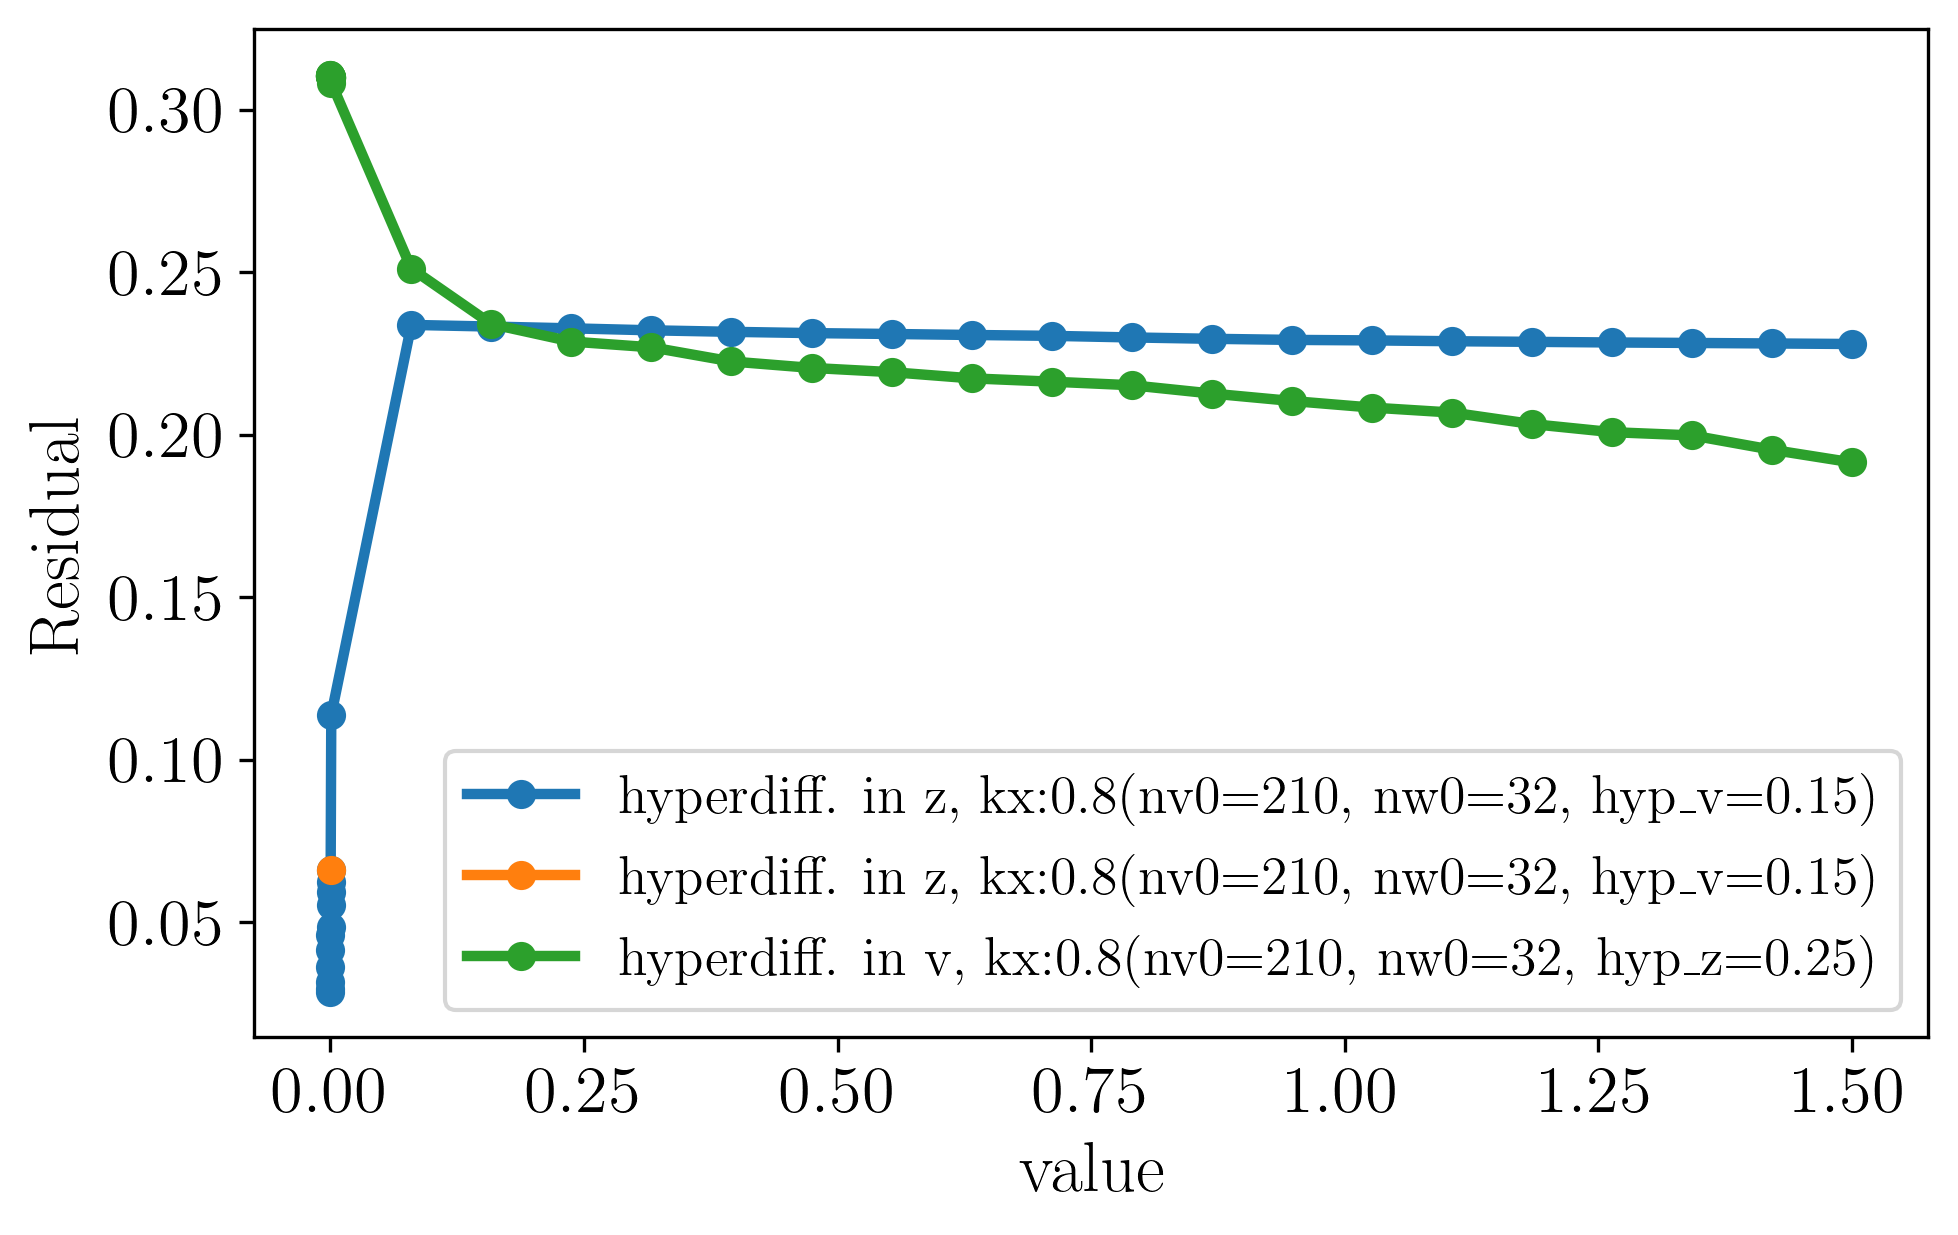

In [279]:
plt.figure()
# plt.plot(scan_hz[:31], res_hz[:31], '-o', label=r"hyperdiff. in  z, kx:0.05(nv0=210, nw0=32, hyp\_v=0.15)")
plt.plot(scan_hz[31:], res_hz[31:], '-o', label=r"hyperdiff. in  z, kx:0.8(nv0=210, nw0=32, hyp\_v=0.15)")
plt.plot(scan_hz[41], res_hz[41], '-o', label=r"hyperdiff. in  z, kx:0.8(nv0=210, nw0=32, hyp\_v=0.15)")
# plt.plot(scan_hz2, res_hz2, '-o', color="C0")
# plt.plot(scan_hz[5], res_hz[5], 'rX')
# plt.plot(scan_hv[:31], res_hv[:31], '-o', label=r"hyperdiff. in  v, kx:0.05(nv0=210, nw0=32, hyp\_z=0.25)")
plt.plot(scan_hv[31:], res_hv[31:], '-o', label=r"hyperdiff. in  v, kx:0.8(nv0=210, nw0=32, hyp\_z=0.25)")
# plt.plot(scan_hv2, res_hv2, '-o', color="C1")
# plt.plot(scan_hv[5], res_hv[5], 'rX')
plt.xlabel(r"value")
plt.ylabel(r"Residual")
# plt.xlim(xmin=0, xmax=0.002)
plt.legend()
plt.show()

In [66]:
np.linspace(0.001, 1.5, 16)

array([1.00000000e-03, 1.00933333e-01, 2.00866667e-01, 3.00800000e-01,
       4.00733333e-01, 5.00666667e-01, 6.00600000e-01, 7.00533333e-01,
       8.00466667e-01, 9.00400000e-01, 1.00033333e+00, 1.10026667e+00,
       1.20020000e+00, 1.30013333e+00, 1.40006667e+00, 1.50000000e+00])